<b><font size=20, color='#A020F0'>Scipy</font></b>

Hannah Zanowski<br>
9/23/24<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Become familiar with the various modules available in Scipy for doing scientific analyses
2. Review examples of some of the more useful Scipy tools and functions

#### Resources

<b>Learning about Scipy:</b><br>
[Scipy website](https://scipy.org/)<br>
[Scipy User Guide](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)<br>

# A little about Scipy

Scipy is a python package that houses various functions that are useful for math, science, and engineering applications. It includes algorithms for all sorts of useful stuff, from optimization to interpolation, differential equations, and statistics. It is more or less an extension of numpy but with some more advanced tools and a few extra data structures for data analysis.

Scipy contains the following modules:
1. Special functions: `scipy.special`
2. Integration: `scipy.integrate`
3. Optimization: `scipy.optimize`
4. Interpolation: `scipy.interpolate`
5. Fourier Transforms: `scipy.fft`
6. Signal Processing: `scipy.signal`
7. Linear Algebra: `scipy.linalg`
8. Compressed Sparse Graph Routines: `scipy.sparse.csgraph`
9. ARPACK for sparse eignevalue problems
10. Spatial data structures and algorithms: `scipy.spatial`
11. Statistics: `scipy.stats`
12. Multidimensional image processing: `scipy.ndimage`
13. File IO: `scipy.io`

# Reading files with Scipy

Like numpy, Scipy has a module for reading and writing output called [scipy.io](https://docs.scipy.org/doc/scipy/tutorial/io.html). I don't often use scipy for I/O purposes because there are typically much better tools out there for what it can read in. Regardless, you can use `scipy.io` for a number of different filetypes including, `.mat` (MATLAB), `.nc` (netCDF), `.wav` (sound files). You'll get a chance to use `scipy.io` to read in a .wav file as part of your homework.

# Using scipy modules for data analysis
Below we'll cover examples from a subset of the scipy modules so you can see what functions exist in each.

Let's begin by importing the scipy modules and a few other packages we'll need for today:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal,interpolate,integrate,linalg,fft

## scipy.stats
[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statsrefmanual) contains functions for doing statistics; it has tools for working with [discrete](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) and [continuous](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) probablity distributions, correlation functions, summary + frequency statistics, statistical tests, etc. You are already familiar with a couple of scipy.stats functions (e.g., `pearsonr()` and `linregress()`), which you used in your first in class notebook.

Below we'll get some practice working with [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) and [scipy.stats.pdf](). 

First, let's generate some data and plot a histogram:

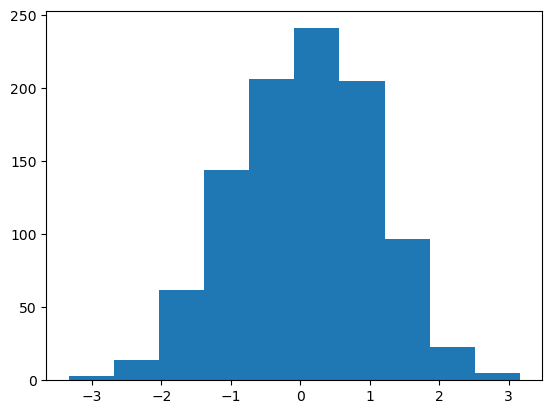

In [3]:
data=stats.norm.rvs(loc=0, scale=1, size=1000) #loc=mean, scale=standard deviation, .rvs means generate a randome variable with `size` # of samples
plt.hist(data); #plot the data

Now let's add an actual [probability distribution function](https://en.wikipedia.org/wiki/Probability_distribution) to the plot. To do that we need to do the following:

In [4]:
#Create an x-axis variable that spans the normal distribution
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100) 
#ppf=percent point function--this means get the percentiles!

#Create the pdf with the above parameters:
pdf=stats.norm.pdf(x)

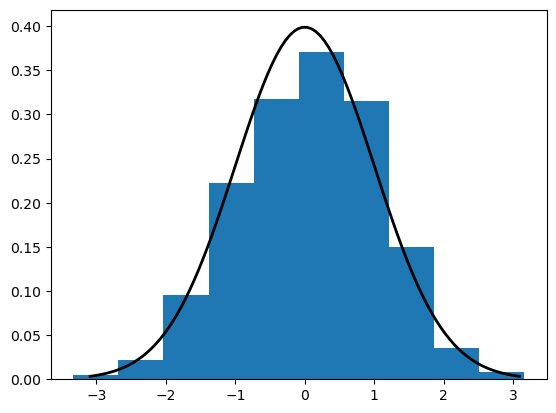

In [5]:
plt.hist(data,density=True) #density=True tells hist to plot your y-values as densities rather than counts!
plt.gca().plot(x, pdf ,'k', lw=2) #plot the pdf line

You can also compute and plot the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function):

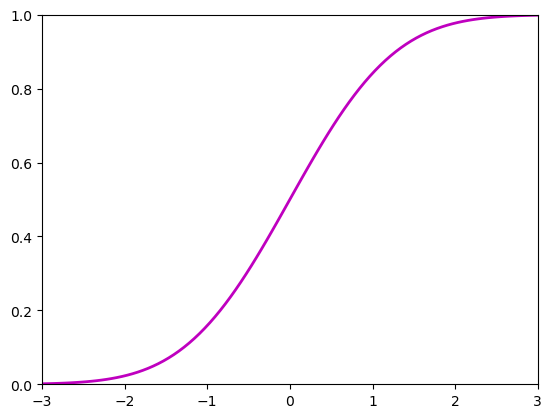

In [6]:
#compute the cdf
cdf=stats.norm.cdf(x)
#plot the cdf
plt.plot(x, cdf,'m', lw=2)
plt.ylim(0,1);
plt.xlim(-3,3);

You can do statistical testing as well. Let's assume that the data we created above is our true distribution. We'll create another normal distribution below that will be our sample distribution:

In [7]:
sample=stats.norm.rvs(loc=5, scale=1, size=100, random_state=None) #create a new random variable of size 100 and a different mean

Let's plot both histograms to see how they compare:

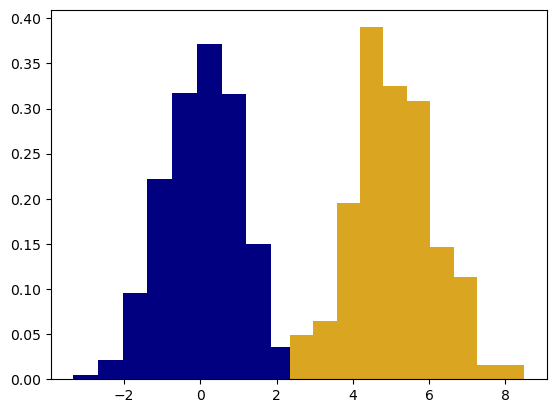

In [8]:
#plot the data
plt.hist(data,density=True,color='navy');
plt.hist(sample,density=True,color='goldenrod');

Now let's calculate a t-statistic using a [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy-stats-ttest-1samp) to see if our sample mean is different from the "population" mean (which is zero):

In [9]:
stats.ttest_1samp(sample,popmean=0)

TtestResult(statistic=np.float64(47.14673649208901), pvalue=np.float64(1.2239794746408364e-69), df=np.int64(99))

## scipy.signal
[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) is useful for all things signal processing. I often use it for [filtering](https://docs.scipy.org/doc/scipy/reference/signal.html#filtering) time series, [convolutions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy-signal-convolve), and [detrending](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html). For the examples that follow, let's read in our Nino3.4 data from last week's notebook. If you don't have the data anymore you can run the following command to download it again: 

```!curl -O https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt```

In [11]:
!curl -O https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29602  100 29602    0     0   155k      0 --:--:-- --:--:-- --:--:--  155k


(0.0, 896.0)

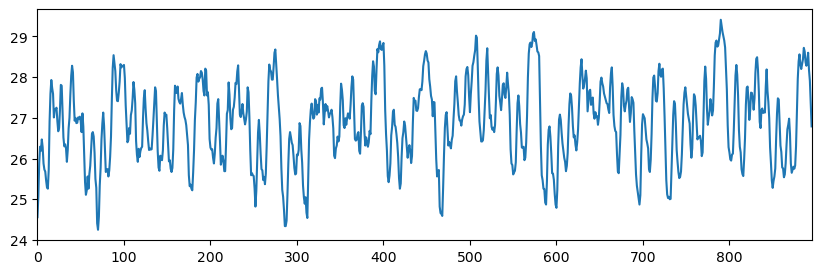

In [12]:
nino34=np.genfromtxt('detrend.nino34.ascii.txt',skip_header=1)
sst=nino34[:,2] #get sst
ssta=nino34[:,-1] #get sst anomaly
fig,ax=plt.subplots(figsize=(10,3))
plt.plot(sst)
plt.xlim(0,len(sst)) #set xlimits of plot

Let's [detrend](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html) the Nino3.4 SSTs:

In [13]:
n34_detrend=signal.detrend(sst)

(0.0, 896.0)

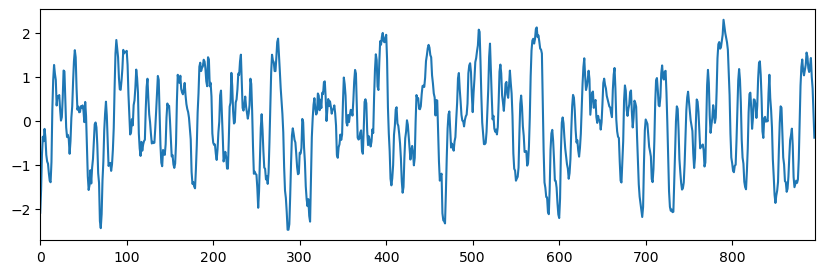

In [14]:
fig,ax=plt.subplots(figsize=(10,3))
ax.plot(n34_detrend)
ax.set_xlim(0,len(n34_detrend)) #set xlimits of plot
#overlay sst anomalies for fun
#plt.plot(ssta)

Now let's filter the time series so that only variations with time scales longer than a certain frequency cutoff are kept (1 year in this example). As an example, we'll build a [Butterworth](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy-signal-butter) filter to do this, which generally does well for low-frequency signals

><b><font color='blue'>Note: </font></b> The [Lanczos Filter](https://en.wikipedia.org/wiki/Lanczos_resampling) is another filter commonly used in the Atmospheric Sciences

In [15]:
bfilt=signal.butter(5, 1/12, 'lowpass',output='sos') #design the filter--order of filter, cutoff frequency (units of 1/time!!!), type, output type
n34_filtered=signal.sosfiltfilt(bfilt,n34_detrend) #apply filter to the data, in this case with a 
#forward backward filter to preserve the phase of the signal

#BEWARE: using the b,a coefficients output (the default output type) can lead to some numerical issues when applying the filter
#If this is an issue you can change the output type using the 'output' keyword like we did above
#b,a=signal.butter(5, 1/12, 'lowpass') #design the filter--order of filter, cutoff frequency, type
#n34_filtered=signal.filtfilt(b, a, n34_detrend) #apply filter to the data, in this case with a forward backward filter

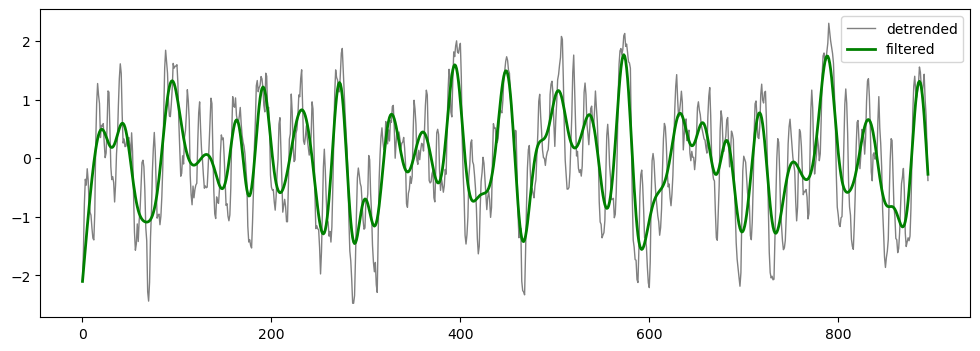

In [16]:
fig,ax=plt.subplots()
fig.set_size_inches(12,4)
#plot original detrended and filtered data
plt.plot(n34_detrend,color='0.5',lw=1,label='detrended')
plt.plot(n34_filtered,color='g',lw=2,label='filtered')
plt.legend()

At the end of the day filtering is effectively a [convolution](https://en.wikipedia.org/wiki/Convolution). For example, we can apply a [boxcar filter](https://en.wikipedia.org/wiki/Boxcar_function) (a rolling mean) to our Nino3.4 time series by [convolving](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy-signal-convolve) the time series with the boxcar filter:

In [17]:
bxfilt=[1/3,1/3,1/3] #3 time steps, equal weights (these are normalized)
n34_rolling=signal.convolve(n34_detrend,bxfilt,mode='valid') #do the convolution; mode specifies the length of the return sequence

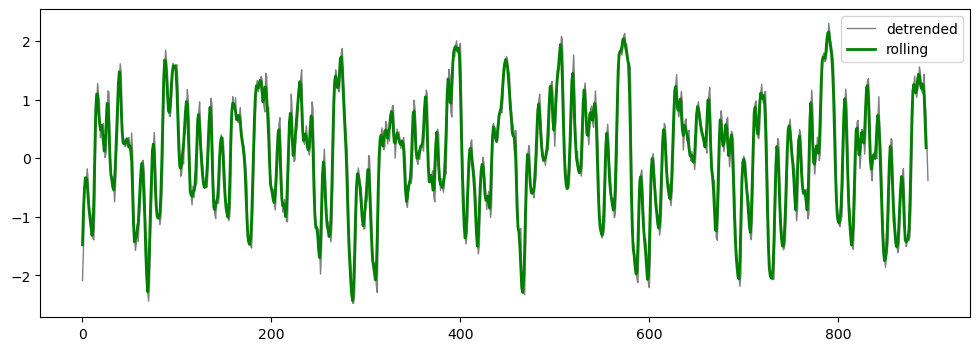

In [18]:
fig,ax=plt.subplots()
fig.set_size_inches(12,4)
plt.plot(n34_detrend,color='0.5',lw=1,label='detrended') #plot the detrended data
plt.plot(n34_rolling,color='g',lw=2,label='rolling') #plot the smoothed data
plt.legend() #adds a legend--legend uses the label keywords provided to the plot() command

## scipy.fft
You can also do discrete [Fourier Transforms](https://en.wikipedia.org/wiki/Fourier_transform) with [scipy.fft](https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft). Let's transform our Nino3.4 sst anomalies using [fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy-fft-fft):

In [19]:
nino34_fft=fft.fft(ssta)

Now plot the output in frequency space:

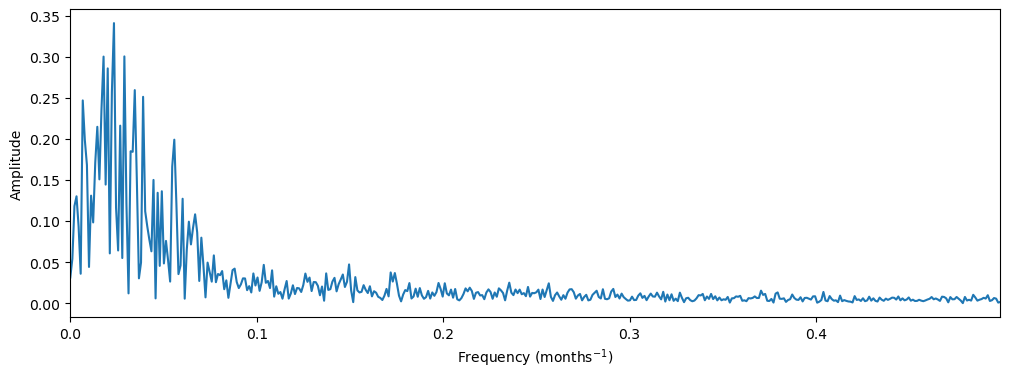

In [20]:
tstep=1 #data is monthly, which is the size of the tstep. For data w/a sampling rate (samples per second), 1 tstep is 1/sampling_rate
N=len(ssta) #number of samples (length of data)
freq=fft.fftfreq(N,tstep)[:(N//2)] #get the frequencies for the x axis of the plot; only get the first half--the second half is a mirror image!

#Set up the plot
fig,ax=plt.subplots(figsize=(12,4))
#only plot the absolute values (ffts have real and complex components!)
plt.plot(freq,(2.0/N)*np.abs(nino34_fft[0:(N//2)])) #2/N is a normalization factor
plt.xlim(freq[0],freq[-1])
plt.ylabel('Amplitude')
plt.xlabel('Frequency (months$^{-1}$)');

## scipy.linalg

We can also do linear algebra in scipy using [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html#linear-algebra-scipy-linalg). Let's make a matrix and do some computations on it:

In [21]:
M=np.array([[1,0,5],[-1,3,8],[6,-5,-2]])
M

array([[ 1,  0,  5],
       [-1,  3,  8],
       [ 6, -5, -2]])

We can compute the inverse and determinant (if you want to calculate the trace that's in numpy!)

In [22]:
linalg.inv(M)

array([[-1.09677419,  0.80645161,  0.48387097],
       [-1.48387097,  1.03225806,  0.41935484],
       [ 0.41935484, -0.16129032, -0.09677419]])

In [23]:
linalg.det(M)

np.float64(-30.99999999999999)

We can also decompose matrices. Here's an example of a [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition), which is done using [linalg.svd()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd). This is really useful if you need to calculate empirical orthogonal functions!

Below U comprises the left singular vectors, V the right singular vectors, and L the sorted singular values

In [24]:
U,L,V=linalg.svd(M)
L

array([10.88599976,  6.80587513,  0.41841707])

## scipy.integrate
As its name suggests, [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) contains useful tools for integrating functions. There is support for computing definite and indefinite integrals. Let's set up an example:

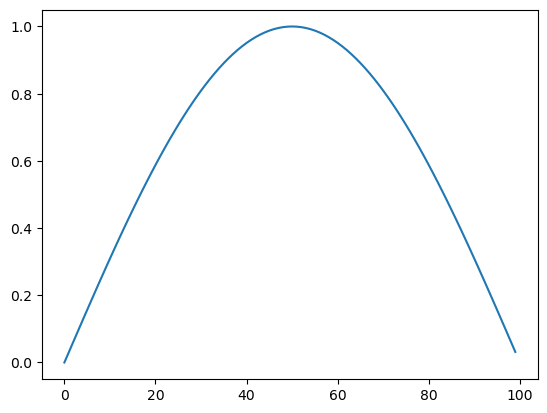

In [25]:
x=np.arange(0,100,1)
y=np.sin(2*np.pi*x/len(x)/2)
plt.plot(x,y)

Say we want to calculate the area under the curve we created. In reality we would probably do this analytically because there is a simple solution, but how would we do so numerically? That's where ```scipy.integrate``` comes in. We'll do a definite integral using [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) as an example:

In [26]:
yint=integrate.simpson(y)
yint

np.float64(63.646272199224406)

We can also cumulatively integrate (indefinite integral). Here's an example using the [Trapezoid Rule](https://en.wikipedia.org/wiki/Trapezoidal_rule):

In [27]:
yintt=integrate.cumulative_trapezoid(y)

Plot the cumulative integral (we integrated a parabola--the result better be something cubic):

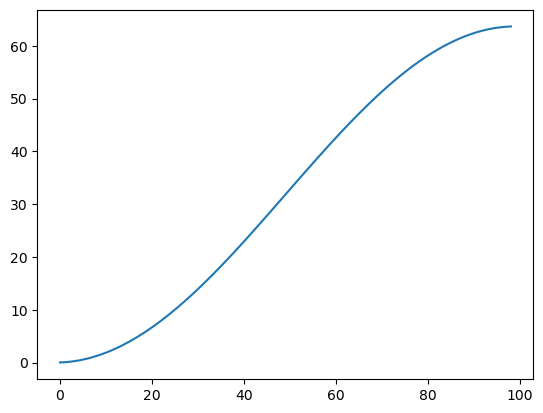

In [28]:
plt.plot(x[:-1],yintt)

## scipy.interpolate
[scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) has many different algorithms for interpolating.

Let's use [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) to interpolate our Nino3.4 data. In this example we'll shift our monthly sst anomalies by half a month:

In [29]:
months=np.arange(0,len(ssta)) #original months
new_months=np.arange(0.5,len(ssta),1) #new months
#create the interpolate function
f=interpolate.interp1d(months,ssta,kind='linear') #kind is the type of interpolation--we'll use a linear interpolation here
#apply the interpolation function--this means you provide the new locations of the data (the new times in this case) that you want
#your data to be interpolated TO
ssta_interp=f(new_months[:-1])

Let's look at a subset of our original data and the interpolated data to see what happened:

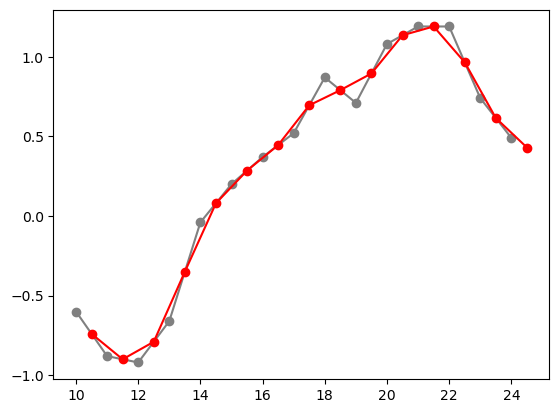

In [30]:
plt.plot(months[10:25],ssta[10:25],label='original',color='0.5',marker='o')
plt.plot(new_months[10:25],ssta_interp[10:25],label='interpolated',color='red',marker='o')

Here's the same example using a different interpolation function, a [CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) (piecewise cubic polynomials):

In [31]:
months=np.arange(0,len(ssta)) #original months
new_months=np.arange(0.5,len(ssta),1) #new months
#create the interpolate function
f=interpolate.CubicSpline(months,ssta,extrapolate='True') 
#apply the interpolation function
ssta_interp=f(new_months)

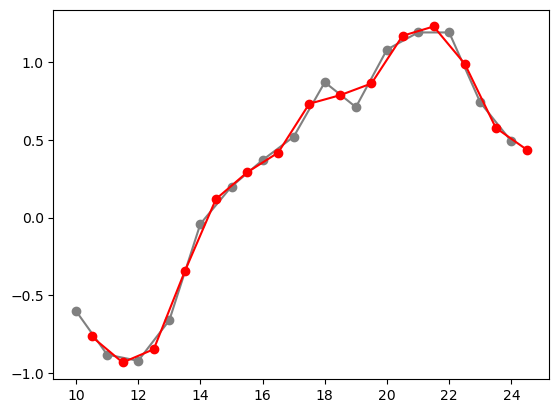

In [32]:
plt.plot(months[10:25],ssta[10:25],label='original',color='0.5',marker='o')
plt.plot(new_months[10:25],ssta_interp[10:25],label='interpolated',color='red',marker='o')